# Assignment 4 Part 2
###  Car preferences
##### Variable Names: 
ID - Identification number of respondent  
Age - Age of respondent (years)  
Sex - 1=female, 2=male  
LicYr - Time they have held a full driving licence, in years and months (years)  
LicMth - Time they have held a full driving licence, in years and months (months)  
ActCar - Make, model and year of car most often driven, coded to size of car 1=small, 2=medium, 3=large  
Kids5 - Children under five, 1=yes, 2=no  
Kids6 - Children 6 to 16, 1=yes, 2=no  
PrefCar - Preferred car, coded to size of car 1=small, 2=medium, 3=large  
Car15k - Preferred type of car if cost $15000, 1=small new car; 2=large second-hand car  
Reason - 1=safety, 2=reliability, 3=cost, 4=performance, 5=comfort, 6=looks  
Cost - How important is cost when buying a car? 1=not important, 2=little importance, 3=important, 4=very important  
Reliable - How important is reliability ...?  
Perform - How important is performance ...?  
Fuel - How important is fuel consumption ...?  
Safety - How important is safety ...?  
AC/PS - How important is air conditioning/power steering ...?  
Park - How important is ease of parking ...?  
Room - How important is space/roominess ...?  
Doors - How important is the number of doors ...?  
Prestige - How important is prestige/style ...?  
Colour - How important is colour ...?  

In [2]:
import pandas as pd
from pandas import plotting
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlib
import plotly.plotly as py
import pylab 
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import math

car_pref = pd.read_csv('Car Preferences.txt',sep='\t', header = 0, index_col=False)

In [4]:
female_pref = car_pref[car_pref["Sex"]==1]
male_pref = car_pref[car_pref["Sex"]==2]
male_pref.describe()

,ID,Age,Sex,LicYr,LicMth,ActCar,Kids5,Kids6,PreferCar,Car15K,...,Reliable,Perform,Fuel,Safety,AC/PS,Park,Room,Doors,Prestige,Colour
count,150.000000,150.000000,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,226.406667,32.940000,2.0,14.506667,0.826667,2.000000,1.920000,1.720000,2.373333,1.620000,...,3.773333,3.226667,3.180000,3.366667,2.680000,2.420000,2.926667,2.460000,2.040000,2.073333
std,108.647147,16.553444,0.0,15.950320,2.298954,0.819232,0.272202,0.450503,0.894027,0.487013,...,0.450900,0.686853,0.686104,0.718095,1.005488,0.921554,0.795091,1.020791,0.873779,0.883075
min,1.000000,18.000000,2.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,130.750000,20.250000,2.0,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,...,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000
50%,243.500000,25.000000,2.0,7.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000
75%,323.750000,42.750000,2.0,24.750000,0.000000,3.000000,2.000000,2.000000,3.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,3.750000,3.000000,3.000000,3.000000,3.000000,3.000000
max,393.000000,75.000000,2.0,57.000000,11.000000,3.000000,2.000000,2.000000,4.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [5]:
female_pref.describe()

,ID,Age,Sex,LicYr,LicMth,ActCar,Kids5,Kids6,PreferCar,Car15K,...,Reliable,Perform,Fuel,Safety,AC/PS,Park,Room,Doors,Prestige,Colour
count,150.000000,150.000000,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,193.566667,35.306667,1.0,15.973333,0.413333,2.000000,1.886667,1.753333,1.966667,1.453333,...,3.886667,3.446667,3.406667,3.786667,3.073333,3.013333,3.053333,2.633333,2.160000,2.300000
std,105.433806,13.987985,0.0,12.728948,1.618628,0.819232,0.318062,0.432515,0.789330,0.499485,...,0.318062,0.660858,0.624947,0.442486,0.963053,0.785666,0.673433,0.992703,0.920169,0.960635
min,3.000000,18.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,109.500000,23.000000,1.0,4.250000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,4.000000,3.000000,3.000000,4.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
50%,183.500000,33.000000,1.0,14.500000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
75%,279.750000,46.000000,1.0,26.000000,0.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000
max,391.000000,71.000000,1.0,50.000000,10.000000,3.000000,2.000000,2.000000,4.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


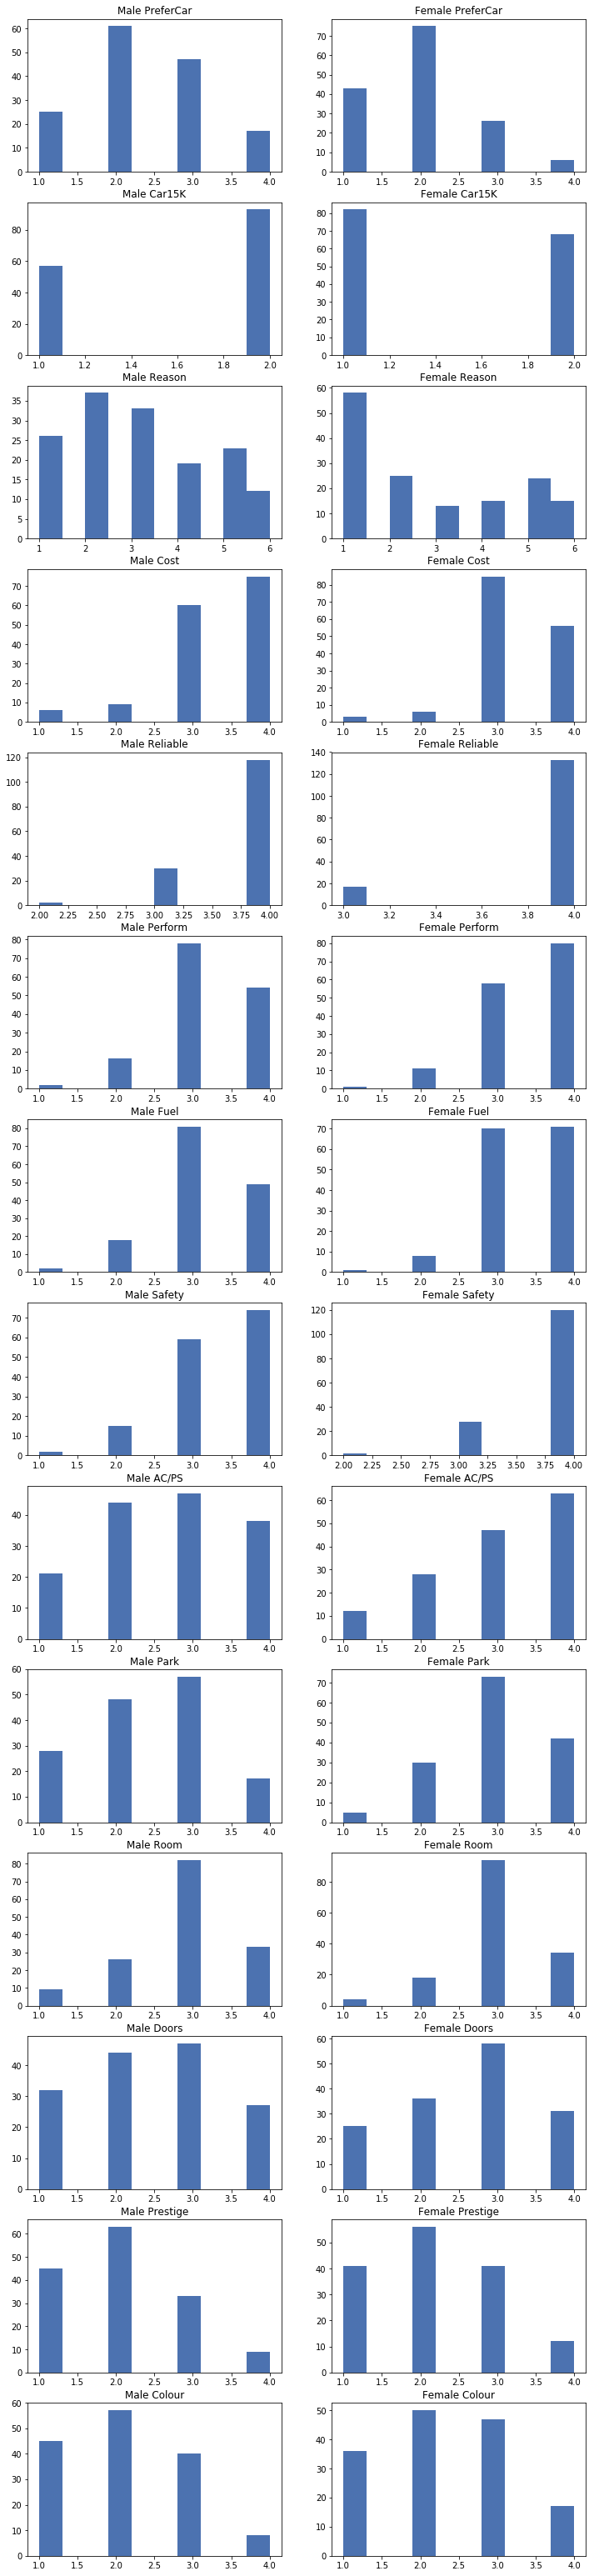

In [10]:
plt.style.use('seaborn-deep')
fig, ax = plt.subplots(nrows = 14, ncols = 2, figsize = (12,56))
ax[0,0].hist(male_pref["PreferCar"])
ax[0,0].set_title("Male PreferCar")
ax[0,1].hist(female_pref["PreferCar"])
ax[0,1].set_title("Female PreferCar")

ax[1,0].hist(male_pref["Car15K"])
ax[1,0].set_title("Male Car15K")
ax[1,1].hist(female_pref["Car15K"])
ax[1,1].set_title("Female Car15K")

ax[2,0].hist(male_pref["Reason"])
ax[2,0].set_title("Male Reason")
ax[2,1].hist(female_pref["Reason"])
ax[2,1].set_title("Female Reason")

ax[3,0].hist(male_pref["Cost"])
ax[3,0].set_title("Male Cost")
ax[3,1].hist(female_pref["Cost"])
ax[3,1].set_title("Female Cost")

ax[4,0].hist(male_pref["Reliable"])
ax[4,0].set_title("Male Reliable")
ax[4,1].hist(female_pref["Reliable"])
ax[4,1].set_title("Female Reliable")

ax[5,0].hist(male_pref["Perform"])
ax[5,0].set_title("Male Perform")
ax[5,1].hist(female_pref["Perform"])
ax[5,1].set_title("Female Perform")

ax[6,0].hist(male_pref["Fuel"])
ax[6,0].set_title("Male Fuel")
ax[6,1].hist(female_pref["Fuel"])
ax[6,1].set_title("Female Fuel")

ax[7,0].hist(male_pref["Safety"])
ax[7,0].set_title("Male Safety")
ax[7,1].hist(female_pref["Safety"])
ax[7,1].set_title("Female Safety")

ax[8,0].hist(male_pref["AC/PS"])
ax[8,0].set_title("Male AC/PS")
ax[8,1].hist(female_pref["AC/PS"])
ax[8,1].set_title("Female AC/PS")

ax[9,0].hist(male_pref["Park"])
ax[9,0].set_title("Male Park")
ax[9,1].hist(female_pref["Park"])
ax[9,1].set_title("Female Park")

ax[10,0].hist(male_pref["Room"])
ax[10,0].set_title("Male Room")
ax[10,1].hist(female_pref["Room"])
ax[10,1].set_title("Female Room")

ax[11,0].hist(male_pref["Doors"])
ax[11,0].set_title("Male Doors")
ax[11,1].hist(female_pref["Doors"])
ax[11,1].set_title("Female Doors")

ax[12,0].hist(male_pref["Prestige"])
ax[12,0].set_title("Male Prestige")
ax[12,1].hist(female_pref["Prestige"])
ax[12,1].set_title("Female Prestige")

ax[13,0].hist(male_pref["Colour"])
ax[13,0].set_title("Male Colour")
ax[13,1].hist(female_pref["Colour"])
ax[13,1].set_title("Female Colour");

По гистограммам можно сделать оценку предпочтений в выборе автомобилей. Например, если у женщины будет 15000$ более вероятно, что она предпочтет взять маленький новый автомобиль, тогда как мужчина - большой поддержанный.

Так же можно заметить, что женщины более требовательные к автомобилю и для них почти все аспекты важнее, чем для мужчин (в среднем). К этому можно прийти, сравнивая гистограммы для мужчин и женщин, и увидев, что у вторых наблюдается более выраженное смещение оценок в сторону четверки. Так же все средние оценок для женщин > соответственных оценок у мужчин.

In [42]:
table = pd.crosstab(car_pref['Sex'], car_pref["PreferCar"])
table

PreferCar,1,2,3,4
Sex,,,,
1,43,75,26,6
2,25,61,47,17


In [32]:
chi2, prob, df, expected = stats.chi2_contingency(table)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(expected)
print(output.format( chi2, df, prob))

[[34.  68.  36.5 11.5]
 [34.  68.  36.5 11.5]]
test Statistics: 17.507847808569526
degrees of freedom: 3
p-value: 0.0005555699275518034



p-value для X^2, для проверки связи между полом и размером предпочитаемой машины, меньше 5% и можно говорить о наличии связи между двумя признаками. Если посмотреть на сопряженную таблицу, то мужчины предпочитают большие и средние автомобили, а женщины маленькие и средние автомобили.

In [35]:
table = pd.crosstab(car_pref['Sex'], car_pref["Car15K"])
table

Car15K,1,2
Sex,,
1,82,68
2,57,93


In [36]:
chi2, prob, df, expected = stats.chi2_contingency(table)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(expected)
print(output.format( chi2, df, prob))

[[69.5 80.5]
 [69.5 80.5]]
test Statistics: 7.7215246436391265
degrees of freedom: 1
p-value: 0.005456629576417959



p-value для X^2, для проверки связи между полом и машины, которую бы взяли, если бы имели на руках $15K, меньше 5% и можно говорить о наличии связи между двумя признаками. Если посмотреть на сопряженную таблицу, то мужчины бы скорее взяли поддержанный и большой автомобиль, тогда как женщины, маленький и новый. Из данных двух критериев при выборе автомобиля, уже можно сделать вывод, что женщины предпочитают компактность, а мужчины вместительность.

In [40]:
table = pd.crosstab(car_pref['Sex'], car_pref["Reason"])
table_freq = table/150
table_freq

Reason,1,2,3,4,5,6
Sex,,,,,,
1,0.386667,0.166667,0.086667,0.100000,0.160000,0.10
2,0.173333,0.246667,0.220000,0.126667,0.153333,0.08


In [38]:
chi2, prob, df, expected = stats.chi2_contingency(table)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(expected)
print(output.format( chi2, df, prob))

[[42.  31.  23.  17.  23.5 13.5]
 [42.  31.  23.  17.  23.5 13.5]]
test Statistics: 24.033907173922653
degrees of freedom: 5
p-value: 0.0002138796434356735



p-value для X^2, для проверки связи между полом и качество, которое является приоритетным, меньше 5% и можно говорить о наличии связи между двумя признаками. Из таблицы видно, что для женщин важно, чтобы автомобиль был безопасным, а для мужчин важна надежность и стоимость.

In [43]:
table = pd.crosstab(car_pref['Sex'], car_pref["Cost"])
table_freq = table/150
table_freq

Cost,1,2,3,4
Sex,,,,
1,0.02,0.04,0.566667,0.373333
2,0.04,0.06,0.400000,0.500000


In [45]:
chi2, prob, df, expected = stats.chi2_contingency(table)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(expected)
print(output.format( chi2, df, prob))

[[ 4.5  7.5 72.5 65.5]
 [ 4.5  7.5 72.5 65.5]]
test Statistics: 8.666070018425902
degrees of freedom: 3
p-value: 0.03407647064935651



p-value для X^2, для проверки связи между полом и желаемой стоимостью автомобиля, меньше 5% и можно говорить о наличии связи между двумя признаками. Для мужчин стоимость является более важным критерием, чем для женщин.

In [47]:
table = pd.crosstab(car_pref['Sex'], car_pref["Reliable"])
table_freq = table/150
table_freq

Reliable,2,3,4
Sex,,,
1,0.000000,0.113333,0.886667
2,0.013333,0.200000,0.786667


In [48]:
chi2, prob, df, expected = stats.chi2_contingency(table)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(expected)
print(output.format( chi2, df, prob))

[[  1.   23.5 125.5]
 [  1.   23.5 125.5]]
test Statistics: 6.492159023480546
degrees of freedom: 2
p-value: 0.03892652003231422



p-value для X^2, для проверки связи между полом и критерием надежности автомобиля, меньше 5% и можно говорить о наличии связи между двумя признаками. Для обоих полов данный признак без сомнения является важным, но для женщин, он немножко важнее, чем для мужчин. Далее, чтобы исключить повторения, p-value будет упоминаться только в случае, если оно будет больше 5%.

In [49]:
table = pd.crosstab(car_pref['Sex'], car_pref["Perform"])
table_freq = table/150
table_freq

Perform,1,2,3,4
Sex,,,,
1,0.006667,0.073333,0.386667,0.533333
2,0.013333,0.106667,0.520000,0.360000


In [50]:
chi2, prob, df, expected = stats.chi2_contingency(table)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(expected)
print(output.format( chi2, df, prob))

[[ 1.5 13.5 68.  67. ]
 [ 1.5 13.5 68.  67. ]]
test Statistics: 9.24521184925048
degrees of freedom: 3
p-value: 0.0262022176341909



Для женщин важнее производительность, чем для мужчин.

In [53]:
table = pd.crosstab(car_pref['Sex'], car_pref["Fuel"])
table_freq = table/150
table_freq

Fuel,1,2,3,4
Sex,,,,
1,0.006667,0.053333,0.466667,0.473333
2,0.013333,0.120000,0.540000,0.326667


In [54]:
chi2, prob, df, expected = stats.chi2_contingency(table)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(expected)
print(output.format( chi2, df, prob))

[[ 1.5 13.  75.5 60. ]
 [ 1.5 13.  75.5 60. ]]
test Statistics: 9.01414501613177
degrees of freedom: 3
p-value: 0.029103410788558062



И в показателе количества потребляемого топлива, женщины оказались более требовательными, чем мужчины.

In [56]:
table = pd.crosstab(car_pref['Sex'], car_pref["Safety"])
table_freq = table/150
table_freq

Safety,1,2,3,4
Sex,,,,
1,0.000000,0.013333,0.186667,0.800000
2,0.013333,0.100000,0.393333,0.493333


In [58]:
chi2, prob, df, expected = stats.chi2_contingency(table)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(expected)
print(output.format( chi2, df, prob))

[[ 1.   8.5 43.5 97. ]
 [ 1.   8.5 43.5 97. ]]
test Statistics: 33.89436997692785
degrees of freedom: 3
p-value: 2.085565724833716e-07



И в показателе безопасности женщины опять же требовательнее, в данном случае разница более выраженная, нежели в остальных критериях.

In [60]:
table = pd.crosstab(car_pref['Sex'], car_pref["AC/PS"])
table_freq = table/150
table_freq

AC/PS,1,2,3,4
Sex,,,,
1,0.08,0.186667,0.313333,0.420000
2,0.14,0.293333,0.313333,0.253333


In [61]:
chi2, prob, df, expected = stats.chi2_contingency(table)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(expected)
print(output.format( chi2, df, prob))

[[16.5 36.  47.  50.5]
 [16.5 36.  47.  50.5]]
test Statistics: 12.1982198219822
degrees of freedom: 3
p-value: 0.006734088819250134



In [64]:
table = pd.crosstab(car_pref['Sex'], car_pref["Park"])
table_freq = table/150
table_freq

Park,1,2,3,4
Sex,,,,
1,0.033333,0.20,0.486667,0.280000
2,0.186667,0.32,0.380000,0.113333


In [65]:
chi2, prob, df, expected = stats.chi2_contingency(table)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(expected)
print(output.format( chi2, df, prob))

[[16.5 39.  65.  29.5]
 [16.5 39.  65.  29.5]]
test Statistics: 32.746600292363006
degrees of freedom: 3
p-value: 3.642431271850672e-07



In [68]:
table = pd.crosstab(car_pref['Sex'], car_pref["Room"])
table_freq = table/150
table_freq

Room,1,2,3,4
Sex,,,,
1,0.026667,0.120000,0.626667,0.226667
2,0.060000,0.173333,0.546667,0.220000


In [69]:
chi2, prob, df, expected = stats.chi2_contingency(table)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(expected)
print(output.format( chi2, df, prob))

[[ 6.5 22.  88.  33.5]
 [ 6.5 22.  88.  33.5]]
test Statistics: 4.2107295689385245
degrees of freedom: 3
p-value: 0.2395898450353886



Удобность в парковке и комфорт для женщин опять же оказался более важным, чем для мужчин.  p-value для X^2, для проверки связи между полом и критерием наличия места внутри автомобиля, больше 5% и нельзя говорить о наличии связи между двумя признаками. Так что можно сказать, что для обоих полов этот критерий, является одинаково приоритетным.

In [70]:
table = pd.crosstab(car_pref['Sex'], car_pref["Doors"])
table_freq = table/150
table_freq

Doors,1,2,3,4
Sex,,,,
1,0.166667,0.240000,0.386667,0.206667
2,0.213333,0.293333,0.313333,0.180000


In [71]:
chi2, prob, df, expected = stats.chi2_contingency(table)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(expected)
print(output.format( chi2, df, prob))

[[28.5 40.  52.5 29. ]
 [28.5 40.  52.5 29. ]]
test Statistics: 3.0878921441534875
degrees of freedom: 3
p-value: 0.3782714544997431



Количество желаемых дверей, судя по Х^2 и p-value, для обоих полов не отличается.

In [72]:
table = pd.crosstab(car_pref['Sex'], car_pref["Prestige"])
table_freq = table/150
table_freq

Prestige,1,2,3,4
Sex,,,,
1,0.273333,0.373333,0.273333,0.08
2,0.300000,0.420000,0.220000,0.06


In [73]:
chi2, prob, df, expected = stats.chi2_contingency(table)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(expected)
print(output.format( chi2, df, prob))

[[43.  59.5 37.  10.5]
 [43.  59.5 37.  10.5]]
test Statistics: 1.8912475109465534
degrees of freedom: 3
p-value: 0.5952825012968646



Престижность автомобиля, судя по Х^2 и p-value, для обоих полов не отличается.

In [75]:
table = pd.crosstab(car_pref['Sex'], car_pref["Colour"])
table_freq = table/150
table_freq

Colour,1,2,3,4
Sex,,,,
1,0.24,0.333333,0.313333,0.113333
2,0.30,0.380000,0.266667,0.053333


In [76]:
chi2, prob, df, expected = stats.chi2_contingency(table)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(expected)
print(output.format( chi2, df, prob))

[[40.5 53.5 43.5 12.5]
 [40.5 53.5 43.5 12.5]]
test Statistics: 5.261162316038242
degrees of freedom: 3
p-value: 0.15364245484210964



Важность критерия цвета автомобиля, судя по Х^2 и p-value, для обоих полов не отличается.

### Итог:
Женщины, как это было упомято при посроении диаграмм, оказались более требовательными. Для них такие критерии как: производительность, расход топлива, безопасность, удобство в парковке и комфорт оказались немного важнее, чем для мужчин. Для мужчин же оказался важнее только критерий стоимости. Так же мужчины предпочитают более вместительный, а женщины более компактный автомобиль. По остальным критериям (цвет, престижность, количество дверей и свободного места) оба пола не имеют выраженных различий в предпочтениях.